# Vehicle Price Analysis

### Objective: To determine which factors influence the price of the vehicle

## Description of the data
The dataset contains the following fields:
 - price
 - model_year
 - model
 - condition
 - cylinders
 - fuel — gas, diesel, etc.
 - odometer — the vehicle's mileage when the ad was published
 - transmission
 - paint_color
 - is_4wd — whether the vehicle has 4-wheel drive Boolean type)
 - date_posted — the date the ad was published
 - days_listed — from publication to removal

## Step 1. Open the data file and study the general information

In [63]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
import pandas as pd
from io import BytesIO
import requests
spreadsheet_id = '1UliEfA8hDCaJiJzbIKSVg068Q0P8ydzrYyl4aUY2XkA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
vehicle_data = pd.read_csv(BytesIO(r.content))
vehicle_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [6]:
vehicle_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [8]:
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


> - At first glance, there is a lot of missing values especially in the <b>is_4wd</b> column
> -  The maximum price is 375,000, which can't be right.
> - The maximum value for <b>odometer</b> is 990,000, which is a lot and could be a misprint
> - We need to determine how we are going to fill the missing values or if we're going to drop them

In [9]:
def number_of_nulls(vehicle_data):
    null_values = vehicle_data.isnull().sum()
    percentage_of_null_values = vehicle_data.isnull().sum() / len(vehicle_data) *100
    null_values_table = pd.concat([null_values, percentage_of_null_values], axis = 1).\
                        rename(columns = {0 : 'Null Values', 1 : 'Percentage of Null Values'}).round(2)
    return null_values_table

number_of_nulls(vehicle_data)

,Null Values,Percentage of Null Values
price,0,0.00
model_year,3619,7.02
model,0,0.00
condition,0,0.00
cylinders,5260,10.21
fuel,0,0.00
odometer,7892,15.32
transmission,0,0.00
type,0,0.00
paint_color,9267,17.99


>  We have 5 rows that have missing values. Also, we can see that we need to fix the datatype. There are missing values because whomever collected the data either left it blank or that was the way the data was transferred. Now onto preprocessing.

## Step 2. Data preprocessing

In [10]:
vehicle_data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
display(vehicle_data['odometer'].agg(['mean', 'median']).round(2))
vehicle_data['odometer'] = vehicle_data['odometer'].fillna(vehicle_data['odometer'].median())


mean      115553.46
median    113000.00
Name: odometer, dtype: float64

In [12]:
vehicle_data = vehicle_data.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
#vehicle_data.isnull().sum()

In [13]:
vehicle_data['paint_color']= vehicle_data['paint_color'].fillna('other')

In [14]:
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].fillna(0)

> - I decided to fill in the odometer using the median
> - I dropped the missing values in <b>model_year</b> and <b>cylinders</b> because it is only less than 10% of the data and dropping it would not skew the result very much
> - I filled in the missing values in paint_color column by creating a new category "other' because the color might not be on the list
> - Column <b>is_4wd</b> is a Boolean with 1 as True and we can safely assume that the missing values represent 0 or False

In [15]:
vehicle_data.isnull().sum()
number_of_nulls(vehicle_data)


,Null Values,Percentage of Null Values
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


> There's no more missing values and now we can go ahead and continue. We need to check if the columns have appropriate datatypes

### Converting to required data types

In [16]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
price           43009 non-null int64
model_year      43009 non-null float64
model           43009 non-null object
condition       43009 non-null object
cylinders       43009 non-null float64
fuel            43009 non-null object
odometer        43009 non-null float64
transmission    43009 non-null object
type            43009 non-null object
paint_color     43009 non-null object
is_4wd          43009 non-null float64
date_posted     43009 non-null object
days_listed     43009 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 4.3+ MB


In [17]:
#changing datatypes
vehicle_data[['model_year','cylinders','odometer', 'is_4wd']] = vehicle_data[['model_year',\
                                                                              'cylinders',\
                                                                              'odometer',\
                                                                              'is_4wd']].astype(int)

In [18]:
vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
price           43009 non-null int64
model_year      43009 non-null int64
model           43009 non-null object
condition       43009 non-null object
cylinders       43009 non-null int64
fuel            43009 non-null object
odometer        43009 non-null int64
transmission    43009 non-null object
type            43009 non-null object
paint_color     43009 non-null object
is_4wd          43009 non-null int64
date_posted     43009 non-null object
days_listed     43009 non-null int64
dtypes: int64(6), object(7)
memory usage: 4.3+ MB


> We changed the datatype and now everything is in its correct datatype

In [19]:
#Checking for duplicates
vehicle_data.duplicated().sum()

0

> There are no duplicates so we can keep going

In [20]:
display(vehicle_data[vehicle_data['price'] == 375000])
display(vehicle_data[vehicle_data['odometer'] ==990000])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10477,375000,1999,nissan frontier,good,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33998,4700,2013,chevrolet cruze,good,6,gas,990000,automatic,sedan,black,0,2018-05-02,4


> 375,000 for a 1999 Nissan Frontier is definitely a misprint and also 990,000 miles for a Chevy Cruze is not possible so that definitely is a misprint too

## Step 3. Calculate and add to the table the following:

> - Day of the week, month, and year the ad was placed
> - The vehicle's age (in years) when the ad was placed
> - The vehicle's average mileage per year

In [21]:
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'])

In [22]:
#Adding day, week , month and year to the dataframe
vehicle_data['dow_posted'] = vehicle_data['date_posted'].dt.dayofweek
vehicle_data['week_posted'] = vehicle_data['date_posted'].dt.weekday
vehicle_data['month_posted'] = vehicle_data['date_posted'].dt.month
vehicle_data['year_posted'] = vehicle_data['date_posted'].dt.year
vehicle_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,week_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,5,6,2018
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,2,2019
2,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,4,3,2019
3,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,1,4,2019
4,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,2,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,2,10,2018
43005,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,2,11,2018
43006,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,3,11,2018
43007,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,0,7,2018


> - I casted the <b>date_posted</b> column to make it easier to get the day,week, month and year from that column
> - I then created a new column based on the results we got

In [23]:
#Calculating vehicle's age
vehicle_data['age_in_yrs'] = vehicle_data['year_posted'] - vehicle_data['model_year']


In [24]:
#changing age_in_yrs ==0 with 1
vehicle_data['age_in_yrs'] = vehicle_data['age_in_yrs'].replace(0,1)

In [25]:
#Calculating avg miles per year 
vehicle_data['avg_miles_per_yr'] = vehicle_data['odometer'] /vehicle_data['age_in_yrs']
vehicle_data['avg_miles_per_yr'] = vehicle_data['avg_miles_per_yr'].round(2)

In [26]:
vehicle_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,dow_posted,week_posted,month_posted,year_posted,age_in_yrs,avg_miles_per_yr
count,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000
mean,12168.670604,2009.761073,6.126276,114967.597038,0.496873,39.573671,2.997047,2.997047,6.640471,2018.306471,8.590481,19362.106016
std,10019.342590,6.266108,1.659540,59882.186015,0.499996,28.180113,1.998934,1.998934,3.474455,0.461033,6.219468,17258.645337
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,4.000000,78840.000000,0.000000,19.000000,1.000000,1.000000,3.000000,2018.000000,4.000000,10307.690000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,3.000000,3.000000,7.000000,2018.000000,7.000000,15081.360000
75%,16900.000000,2014.000000,8.000000,146345.000000,1.000000,53.000000,5.000000,5.000000,10.000000,2019.000000,12.000000,22458.180000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000


> - To avoid getting inf value, I decided to replace the 0 values in **age_in_yrs** with 1 and we won't need to drop the data


In the condition column, replace string values with a numeric scale:
> - new = 5
> - like new = 4
> - excellent = 3
> - good = 2
> - fair = 1
> - salvage = 0

In [27]:
vehicle_data['condition'] = vehicle_data['condition'].\
                            replace(['new','like new', 'excellent', 'good','fair','salvage'],[5, 4, 3, 2, 1, 0])

In [28]:
vehicle_data['condition'].value_counts()

3    20639
2    16841
4     3965
1     1348
5      122
0       94
Name: condition, dtype: int64

> I replaced the string values with a numeric scale. Now it's easier to distinguish the condition of the vehicles. Looking at these, a lot of cars are in excellent and good conditions 

In [29]:
vehicle_data[['price', 'model_year', 'condition', 'cylinders','odometer','days_listed','age_in_yrs']].corr()

,price,model_year,condition,cylinders,odometer,days_listed,age_in_yrs
price,1.000000,0.434491,0.222394,0.295579,-0.390359,-0.001103,-0.428073
model_year,0.434491,1.000000,0.282918,-0.148040,-0.436010,-0.006295,-0.996896
condition,0.222394,0.282918,1.000000,-0.063130,-0.277292,-0.005643,-0.280406
cylinders,0.295579,-0.148040,-0.063130,1.000000,0.082703,0.002502,0.149753
odometer,-0.390359,-0.436010,-0.277292,0.082703,1.000000,0.004797,0.429074
days_listed,-0.001103,-0.006295,-0.005643,0.002502,0.004797,1.000000,0.006968
age_in_yrs,-0.428073,-0.996896,-0.280406,0.149753,0.429074,0.006968,1.000000


> There is lof of negative correlation between values. Although it's pretty clear that vehicle's age and condition should be correlated to the vehicle's price and odomoter with vehicle's age.

Text(0.5, 0.98, 'Histograms of unfiltered data')

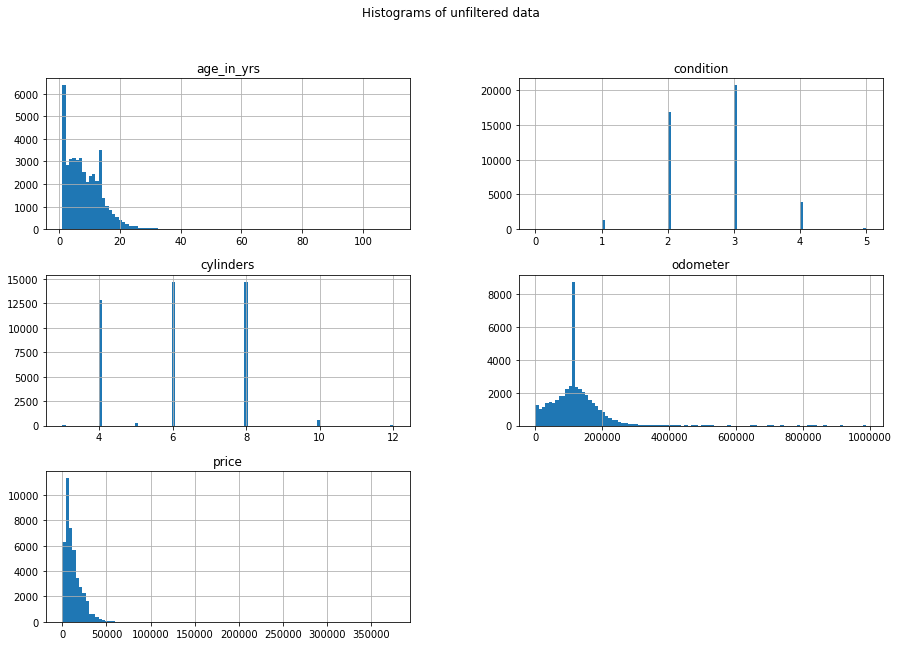

In [30]:
vehicle_data[['price', 'condition', 'cylinders','odometer','age_in_yrs']].hist(bins = 100,figsize=(15,10))
plt.suptitle('Histograms of unfiltered data')


Text(0.5, 1.0, "Histogram of vehicle's mileage")

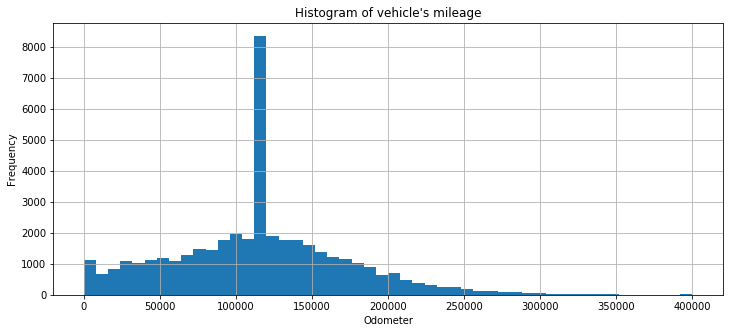

In [31]:
vehicle_data['odometer'].hist(bins = 50,figsize=(12,5),range=(0, 400000))
plt.ylabel('Frequency')
plt.xlabel('Odometer')
plt.title("Histogram of vehicle's mileage")

> - The price histogram chart shows that the distribution is right-skewed. Most of the price values fall within the low range. There is a significant outlier as we can see from the histogram. Prices above 50000 are outliers
> - For the condition's histogram, it shows that vehicles are mostly in good and excellent condition. It has very few outliers
> - Cylinder histogram chart show that most cars have 6 and 8 cylinders. It does contains some few outlier but nothing significant
> - The histogram chart for age_in_yrs shows that most values falls between 0 to 25 with a few values that falls in higher range. We can conclude that vehicle's age older than 30 years is an outlier
> - The histogram chart for vehicle's mileage is right-skewed with and looking closely to the odometer column, vehicle's mileage above 300000 are outliers 

In [32]:
vehicle_data[['price', 'condition', 'cylinders','odometer','age_in_yrs']].describe()

,price,condition,cylinders,odometer,age_in_yrs
count,43009.000000,43009.000000,43009.000000,43009.000000,43009.000000
mean,12168.670604,2.637053,6.126276,114967.597038,8.590481
std,10019.342590,0.713040,1.659540,59882.186015,6.219468
min,1.000000,0.000000,3.000000,0.000000,1.000000
25%,5000.000000,2.000000,4.000000,78840.000000,4.000000
50%,9000.000000,3.000000,6.000000,113000.000000,7.000000
75%,16900.000000,3.000000,8.000000,146345.000000,12.000000
max,375000.000000,5.000000,12.000000,990000.000000,110.000000


### Removing outliers using IQR

> This [article](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/) gives us multiple ways to remove outliers. I'm just going to use IQR, which is the widely used one

In [33]:
cols = ['price','age_in_yrs', 'odometer']

Q1 = vehicle_data[cols].quantile(0.25)
Q3 = vehicle_data[cols].quantile(0.75)
IQR = Q3 - Q1 

vehicle_no_outliers = vehicle_data[~((vehicle_data[cols] < (Q1 - 1.5 * IQR)) | \
                                     (vehicle_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
vehicle_no_outliers

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,week_posted,month_posted,year_posted,age_in_yrs,avg_miles_per_yr
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,5,6,2018,7,20714.29
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,2,2019,6,18333.33
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,4,3,2019,16,7062.50
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,1,4,2019,2,40451.50
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,2,6,2018,4,14488.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,2,10,2018,5,17627.20
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,2,11,2018,16,11343.75
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,3,11,2018,9,14222.22
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,0,7,2018,5,27914.60


In [34]:
vehicle_no_outliers.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,dow_posted,week_posted,month_posted,year_posted,age_in_yrs,avg_miles_per_yr
count,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000,40069.000000
mean,11296.751404,2010.090594,2.638623,6.053258,112863.423020,0.485238,39.567571,2.995233,2.995233,6.641968,2018.306097,8.251067,19085.216901
std,7845.725595,5.166314,0.697606,1.658909,51819.219054,0.499788,28.207308,1.997291,1.997291,3.474496,0.460876,5.125203,16322.857391
min,1.000000,1994.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,81256.000000,0.000000,19.000000,1.000000,1.000000,3.000000,2018.000000,4.000000,10400.000000
50%,8995.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.000000,3.000000,3.000000,7.000000,2018.000000,7.000000,15000.000000
75%,15995.000000,2014.000000,3.000000,8.000000,144400.000000,1.000000,53.000000,5.000000,5.000000,10.000000,2019.000000,12.000000,22162.000000
max,34700.000000,2019.000000,5.000000,12.000000,247548.000000,1.000000,271.000000,6.000000,6.000000,12.000000,2019.000000,24.000000,195700.000000


> - To remove significant outliers, I used IQR to find the limit value.
> - <b>Age_in_yrs</b>, <b>price</b>, and <b>mileage</b> have significant amount of outliers and that's why I only removed outliers from these columns
> - I then created a new dataframe to store the filtered data. Now we can look closely how our data would look without outliers

### Plot histogram using filtered data

Text(0.5, 0.98, 'Histograms with filtered data')

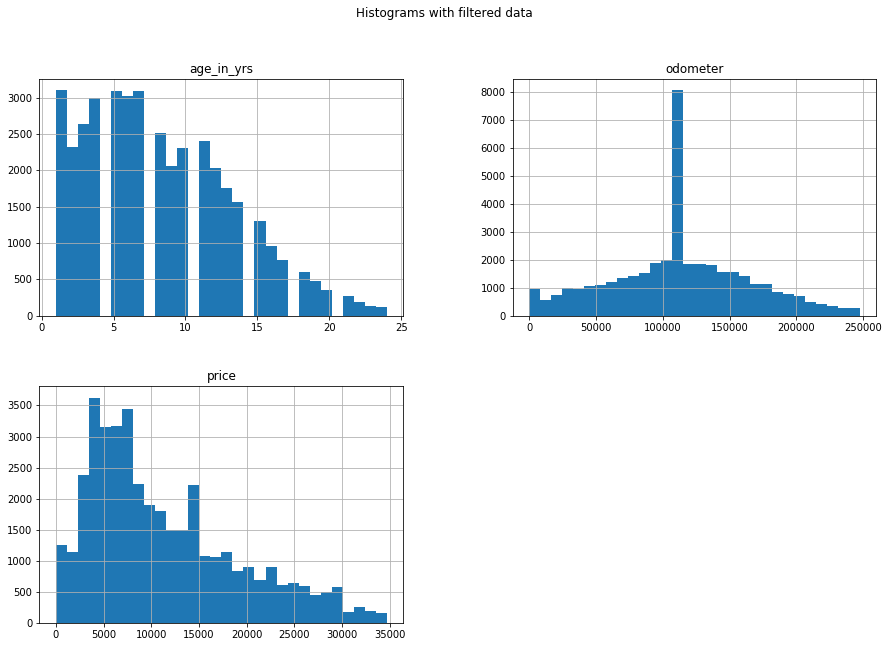

In [35]:
vehicle_no_outliers[['price','age_in_yrs', 'odometer']].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms with filtered data")

> - As we can see after removing outliers, we can no longer see tails of large values to the right of the histogram and  the distribution looks more normal

### Analyze days_listed

Text(0.5, 0, 'Days_listed')

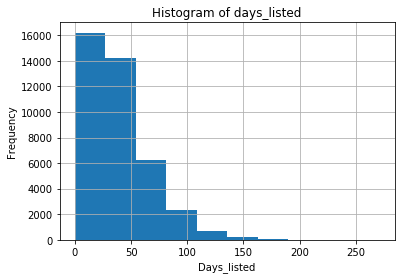

In [36]:
vehicle_no_outliers['days_listed'].hist()
plt.title("Histogram of days_listed")
plt.ylabel("Frequency")
plt.xlabel("Days_listed")

In [37]:
vehicle_no_outliers['days_listed'].describe()

count    40069.000000
mean        39.567571
std         28.207308
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

> - As we can see from the histogram, most cars are listed for at least a month. We need to take this into account when selling a vehicle
> - There are cars that are listed for 0 days which could mean that the car was sold the same day.
> - The mean of the days that the car is listed is 39.56 and the median is 33.
> - The longest amount of days that the car is listed for is 271 days, which is almost a year and a long time for a car to be on sale


In [38]:
#vehicles listed for less than a day
day_0_listing = vehicle_no_outliers.query('days_listed == 0')
len(day_0_listing)

38

In [39]:
#vehicles listed for 1 day
day_1_listing = vehicle_no_outliers.query('days_listed ==1')
len(day_1_listing)

135

In [40]:
#vehicles listed for more than 100 days
day_100_listing = vehicle_no_outliers.query('days_listed > 100')
len(day_100_listing)

1513

In [41]:
day_271 = vehicle_no_outliers.query('days_listed == 271')
len(day_271)

1

In [42]:
vehicle_no_outliers.loc[vehicle_no_outliers['days_listed']== 271]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,week_posted,month_posted,year_posted,age_in_yrs,avg_miles_per_yr
3681,5200,2011,chevrolet impala,4,6,gas,122000,automatic,sedan,other,0,2018-05-24,271,3,3,5,2018,7,17428.57


> - As we can see, most cars are listed for at least a month which is pretty reasonable, but of course it also depends on the condition of the car.
> - We can also see that there are 38 cars that are listed for less than a day and 135 cars that are only listed for 1 day.
> - There are 1513 cars that are listed for more than 100 days.
> - There is 1 car that is listed for 271 days which is a long time for a car to be on sale.
> -Looking closely at the data, the car that is listed for 271 days is a Chevy Impala with 'like new' condition, which is inaccurate considering the car has 122000 miles. This could be why it's still listed . We can conclude that the ads were removed quickly after 1 day and abnormally listed for 271 days.

### Analyze the number of ads and the average price for each type of vehicle

In [43]:
#calculate the average price for each type
vehicle_type = vehicle_no_outliers.pivot_table(index = 'type', values = 'price', aggfunc =['mean','count'])

In [44]:
vehicle_type['mean'].sort_values(by='price', ascending=False).round(2)

,price
type,
bus,18340.29
pickup,15257.67
truck,15185.25
offroad,14403.45
coupe,13470.22
convertible,12862.09
other,10723.15
SUV,10511.67
wagon,9022.51


Text(0, 0.5, 'price')

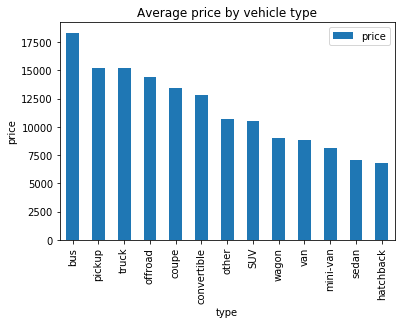

In [45]:
vehicle_type['mean'].sort_values(by='price',ascending=False).plot(kind='bar', title='Average price by vehicle type')
plt.ylabel('price')

> According to this, the most expensive cars are "bus", "pickup" and "truck". This would makes sense because they are the also the biggest

Text(0, 0.5, 'Number of ads')

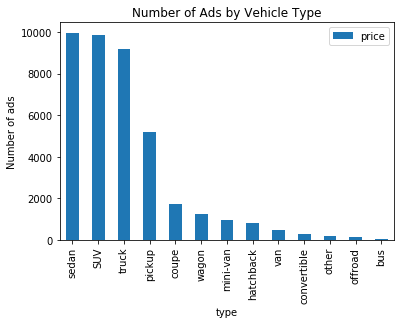

In [46]:
vehicle_type['count'].sort_values(by='price',ascending=False).plot(kind='bar', title = 'Number of Ads by Vehicle Type')
plt.ylabel('Number of ads')

> We can see that the Sedan and SUV have the most ads.

In [47]:
# selecting top 2 vehicles
top_vehicles = vehicle_no_outliers[vehicle_no_outliers['type'].isin(['SUV','sedan'])]


### Factors that impact price the most

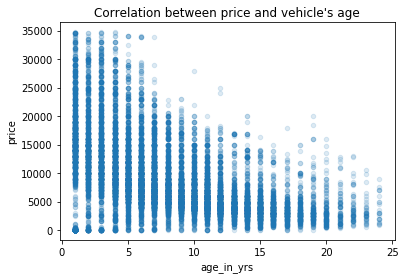

In [48]:
top_vehicles.plot.scatter(x='age_in_yrs',y= 'price', alpha =.15,title= "Correlation between price and vehicle's age")

> As we can see, the newer the vehicle, the higher the price and the older the vehicle, the lower the price. Which makes sense.

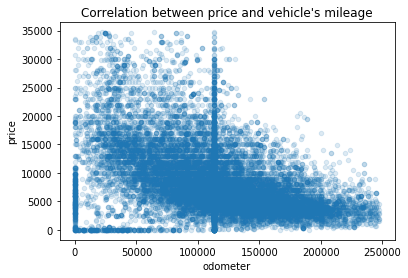

In [49]:
top_vehicles.plot.scatter(x='odometer',y= 'price', alpha =.15,title= "Correlation between price and vehicle's mileage")
plt.show()

> The above scatter plot shows that as the odometer increases, price of a vehicle tends to decrease. It makes sense too as the lower the mileage the higher the price 

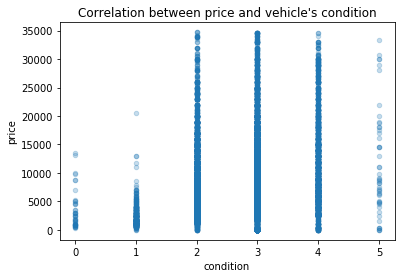

In [50]:
top_vehicles.plot.scatter(x='condition',y= 'price', alpha =.25,\
                          title= "Correlation between price and vehicle's condition")
plt.show()

Text(0.5, 1.0, 'Correlation between price and condition')

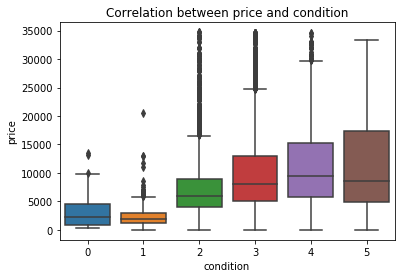

In [51]:
sns.boxplot(x='condition',y= 'price', data =top_vehicles).set_title("Correlation between price and condition")
plt.show()

> We can see that on average, the better the condition, the price tend to be higher. The condition with the most price is the <b>like new</b> condition. The boxplot shows vehicles with <b>fair</b> condition have the lowest price than the rest. This confirms that the condition has an impact on the price

> Categorical variables must have at least 50 ads. Let's see whether categorical variables have at least 50 ads

In [52]:
top_vehicles['transmission'].value_counts()

automatic    18741
manual         846
other          253
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Relationship between price and transmission')

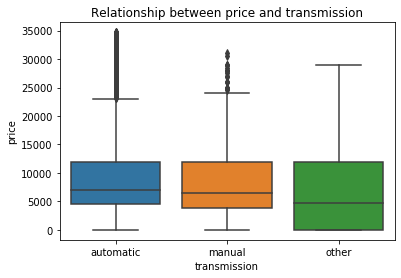

In [53]:
sns.boxplot(x='transmission', y='price', data=top_vehicles).set_title('Relationship between price and transmission')
plt.show()

> Vehicles with automatic transmission tend to be more costly than those with manual transmission. Automatic transmission is easier to operate and thus most newer cars have automatic transmission

In [54]:
top_vehicles['paint_color'].value_counts().loc[lambda x : x >=50]

other     3586
black     3236
silver    2944
white     2780
grey      2277
blue      1840
red       1525
green      505
custom     497
brown      480
orange      72
yellow      50
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


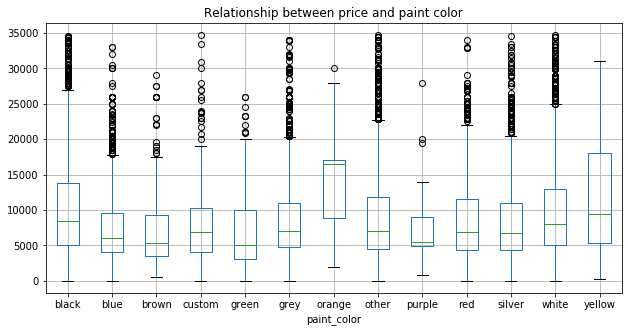

In [64]:
top_vehicles.boxplot(by = 'paint_color',column= 'price',figsize=(10,5))
#plt.suptitle('')
plt.title('Relationship between price and paint color')
plt.suptitle('')
plt.show();

In [56]:
top_vehicles.groupby('paint_color')['price'].max().sort_values(ascending=False)

paint_color
other     34700
custom    34700
white     34699
black     34600
silver    34595
red       34000
grey      33995
blue      32999
yellow    30999
orange    30000
brown     29000
purple    28000
green     25950
Name: price, dtype: int64

> We can see that there is no clear connection between the vehicle's color and price. This might be because color depends on the customer's preference. Because of that, paint color is not a good price predictor.

## Overall Conclusion

> I studied and analyzed the data from Crankshaft List to determine which factors influence vehicle price. The first step was the preprocessing stage and there were five columns that had missing values. I filled missing values with the appropriate method and dropped them if they were less than 10% because it would not affect the result much.

> Then I extracted day of the week, month, and year when an ad was placed,calculated a vehicle's age when the ad was placed and calculated a vehicle's average mileage per year. Then I replaced string values with a numeric scale in the condition column to make analysis easier.

> I also did exploratory analysis.I plotted histograms to look closely at price,vehicle's age, mileage, number of cylinders and condition There were significant outliers with price,vehicle's age and odometer. I decided to use IQR to determine limit values and remove significant outliers.I then plotted another histograms to the filtered data and saw that it was less skewed

> Lastly I went on to analyze what factors influence price the most. I conducted this analysis with the two vehicles that had the most number of ads (sedan and SUV).There were several factors that influence the price that we were asked to analyze. I plotted scatter plots and boxplot to illustrate the correlation between price and these factors and these are the results:
> - The correlation plot of age with price showed that the older the vehicle the lower the price it is and the newer the vehicle, the higher the price which makes sense
> - The scatter plot with vehicle's age shows that the newer the vehicle, the higher the price and the higher the mileage, the lower the price.Typically, fewer miles translate to higher resale value. 
> - Then I move on to the condition. The condition of the car is a key feature.  As we can see from the data that we analyze, cars with good, excellent, and like-new conditions mean higher prices than cars with other conditions. 
> - Based on the scatterplot for the relationship between transmission type and price, we can see that cars with automatic transmission tend to have a higher price than manual transmission types. This shows that the type of transmission is an important factor that affects car price.
> Paint color did not affect the price as it is dependent on the customer's preference and it is not a good price predictor